<a href="https://colab.research.google.com/github/dinesh2018iitism/Learning-Data-Science-Using-AI-From-PW/blob/main/Evaluation_Metrics_and_Regression_Implementation_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Theoretical*

1. What does R-squared represent in a regression model?

In [44]:
# # R-squared shows how much of the variation in the dependent variable (Y)
# is explained by the independent variables (X). It ranges from 0 to 1.

2. What are the assumptions of linear regression?

In [45]:
# Linearity: Relationship between X and Y is linear.
# Independence: Errors are independent.
# Homoscedasticity: Constant variance of errors.
# Normality: Errors follow a normal distribution.
# No multicollinearity: X variables are not highly correlated.

3. What is the difference between R-squared and Adjusted R-squared?

In [46]:
# R-squared: Increases as more variables are added, even if they don’t improve the model.
# Adjusted R-squared: Penalizes adding irrelevant variables; only increases if the variable improves the model.


4. Why do we use Mean Squared Error (MSE)?

In [47]:
# MSE measures how far predictions are from actual values. It gives more weight to
# large errors by squaring them, making it useful for optimization.

5. What does an Adjusted R-squared value of 0.85 indicate?

In [48]:
# It means 85% of the variation in Y is explained by the model, accounting for the number of predictors.

6. How do we check for normality of residuals in linear regression?

In [49]:
# Histogram of residuals.
# Q-Q plot.
# Statistical tests like the Shapiro-Wilk test.


7. What is multicollinearity, and how does it impact regression?

In [50]:
# Multicollinearity happens when independent variables are highly correlated.
# It makes coefficients unstable and hard to interpret.



8. What is Mean Absolute Error (MAE)?

In [51]:
# MAE is the average of the absolute differences between predicted and actual values.
# It’s simple and not sensitive to outliers.

9. What are the benefits of using an ML pipeline?

In [52]:
# Automates workflow.
# Ensures reproducibility.
# Makes model development faster and easier to maintain.

10. Why is RMSE considered more interpretable than MSE?

In [53]:
# RMSE is in the same unit as the target variable,
# while MSE is in squared units, making RMSE easier to understand.

11. What is pickling in Python, and how is it useful in ML?

In [54]:
# Pickling is saving Python objects (like ML models) to a file.
# It allows you to reuse trained models later.

12. What does a high R-squared value mean?

In [55]:
# It means the model explains most of the variation in the target variable,
# but it doesn’t guarantee accuracy.

13. What happens if linear regression assumptions are violated?

In [56]:
# Violations can lead to biased estimates, incorrect predictions, and unreliable results.

14. How can we address multicollinearity in regression?

In [57]:
# Remove highly correlated variables.
# Use dimensionality reduction (e.g., PCA).
# Use regularization (e.g., Ridge regression).

15. How can feature selection improve model performance in regression analysis?

In [58]:
# It removes irrelevant features, reduces overfitting, and improves model efficiency

16. How is Adjusted R-squared calculated?

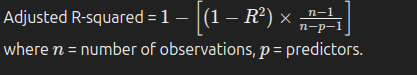

17. Why is MSE sensitive to outliers?

In [59]:
# MSE squares errors, so large errors (outliers) contribute disproportionately,
# making it highly sensitive to them.

18. What is the role of homoscedasticity in linear regression?

In [60]:
# Homoscedasticity ensures that residuals have constant variance. If violated, predictions become unreliable.

19. What is Root Mean Squared Error (RMSE)?

In [61]:
# RMSE is the square root of MSE. It measures the average error magnitude in the same unit as the target

20. Why is pickling considered risky?

In [62]:
# Pickled files can execute malicious code, so avoid loading files from untrusted sources.

21. What alternatives exist to pickling for saving ML models?

In [63]:
# Joblib: Faster for large objects.
# ONNX/PMML: Format-independent model storage.
# JSON: For lightweight data.

22. What is heteroscedasticity, and why is it a problem?

In [64]:
# Heteroscedasticity means residual variance is not constant.
# It can make standard errors unreliable, affecting hypothesis tests.

23. How can interaction terms enhance a regression model's predictive power?

In [65]:
# Interaction terms capture combined effects of variables that may improve accuracy.

# ***Practical***

1.  Write a Python script to visualize the distribution of errors (residuals) for a multiple linear regression model
using Seaborn's "diamonds" dataset.

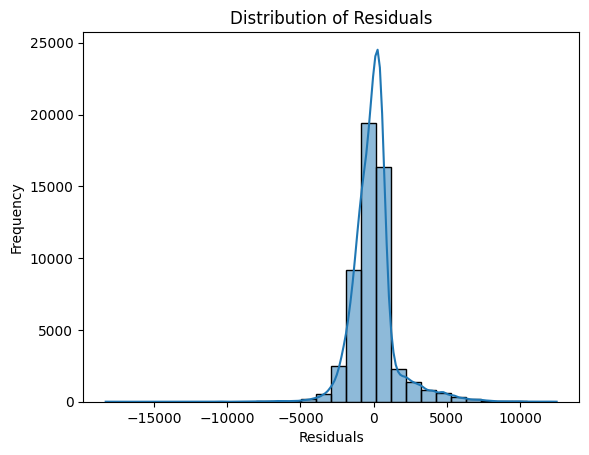

In [66]:
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

diamonds = sns.load_dataset('diamonds')
diamonds = diamonds.dropna()

X = diamonds[['carat', 'depth', 'table']]
y = diamonds['price']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

residuals = model.resid

sns.histplot(residuals, kde=True, bins=30)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


 2. Write a Python script to calculate and print Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root
Mean Squared Error (RMSE) for a linear regression model.

In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

X = np.random.rand(100, 1) * 10
y = 3 * X.flatten() + np.random.randn(100) * 2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)


MSE: 4.00331707536148
MAE: 1.588694160552155
RMSE: 2.000829096989915


3.  Write a Python script to check if the assumptions of linear regression are met. Use a scatter plot to check
linearity, residuals plot for homoscedasticity, and correlation matrix for multicollinearity.


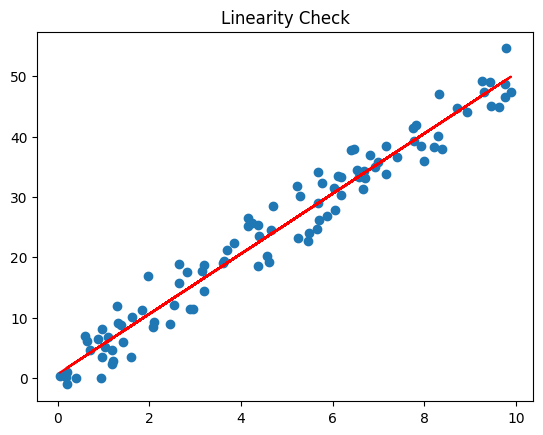

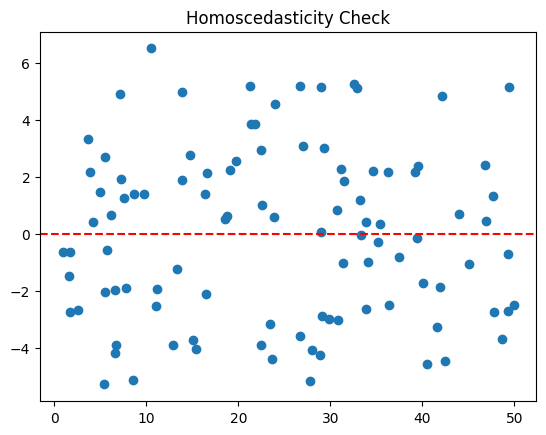

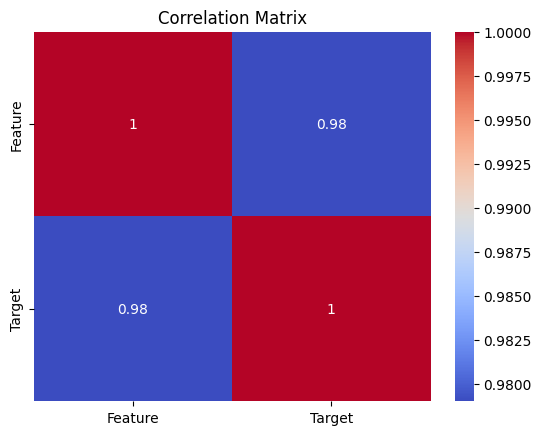

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = 5 * X.flatten() + np.random.randn(100) * 3

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
residuals = y - y_pred

plt.scatter(X, y)
plt.plot(X, y_pred, color="red")
plt.title("Linearity Check")
plt.show()

plt.scatter(y_pred, residuals)
plt.axhline(0, color="red", linestyle="--")
plt.title("Homoscedasticity Check")
plt.show()

df = pd.DataFrame(np.hstack((X, y.reshape(-1, 1))), columns=["Feature", "Target"])
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


4.  Write a Python script that creates a machine learning pipeline with feature scaling and evaluates the
performance of different regression models

In [69]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np

X = np.random.rand(100, 1) * 10
y = 3 * X.flatten() + np.random.randn(100) * 2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("R-squared:", r2_score(y_test, y_pred))


R-squared: 0.8914726657137936


5. Implement a simple linear regression model on a dataset and print the model's coefficients, intercept, and
R-squared score.

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# Generate synthetic data
X = np.random.rand(100, 1) * 10
y = 4 * X.flatten() + np.random.randn(100) * 2

# Fit model
model = LinearRegression()
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Print results
print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)
print("R-squared:", r2_score(y, y_pred))


Coefficient: 3.9717280475011165
Intercept: 0.005994945301679877
R-squared: 0.9642985781388888


6. Write a Python script that analyzes the relationship between total bill and tip in the 'tips' dataset using
simple linear regression and visualizes the results.

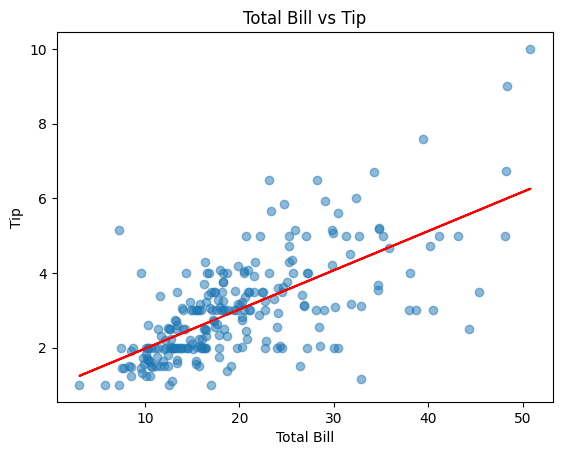

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Load dataset
tips = sns.load_dataset('tips')

# Prepare data
X = tips[['total_bill']]
y = tips['tip']

# Fit model
model = LinearRegression()
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Plot results
plt.scatter(X, y, alpha=0.5)
plt.plot(X, y_pred, color="red")
plt.title("Total Bill vs Tip")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.show()


7. Write a Python script that fits a linear regression model to a synthetic dataset with one feature. Use the
model to predict new values and plot the data points along with the regression line.

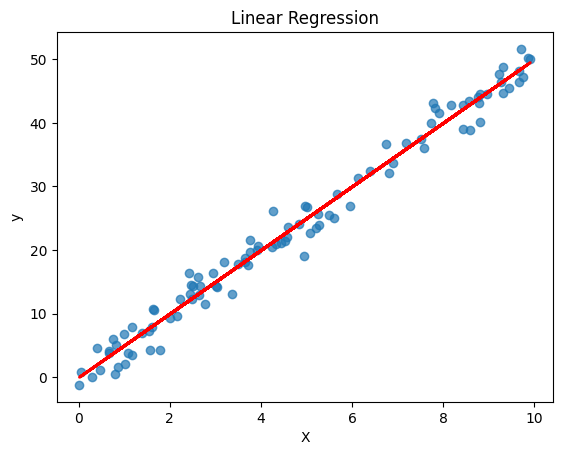

In [72]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Generate synthetic data
X = np.random.rand(100, 1) * 10
y = 5 * X.flatten() + np.random.randn(100) * 2

# Fit model
model = LinearRegression()
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Plot results
plt.scatter(X, y, alpha=0.7)
plt.plot(X, y_pred, color="red", linewidth=2)
plt.title("Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.show()


8. Write a Python script that pickles a trained linear regression model and saves it to a file.

In [73]:
import pickle
from sklearn.linear_model import LinearRegression
import numpy as np

# Generate synthetic data
X = np.random.rand(100, 1) * 10
y = 3 * X.flatten() + np.random.randn(100) * 2

# Fit model
model = LinearRegression()
model.fit(X, y)

# Save model to a file
with open("linear_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model saved as 'linear_model.pkl'")


Model saved as 'linear_model.pkl'


9. Write a Python script that fits a polynomial regression model (degree 2) to a dataset and plots the
regression curve.

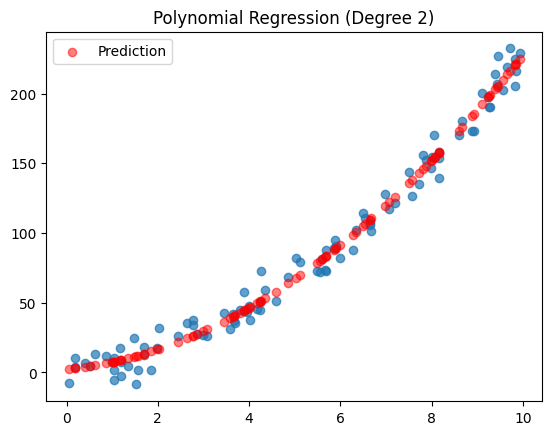

In [74]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic data
X = np.random.rand(100, 1) * 10
y = 2 * (X**2).flatten() + 3 * X.flatten() + np.random.randn(100) * 10

# Transform features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit model
model = LinearRegression()
model.fit(X_poly, y)

# Predict
y_pred = model.predict(X_poly)

# Plot results
plt.scatter(X, y, alpha=0.7)
plt.scatter(X, y_pred, color="red", alpha=0.5, label="Prediction")
plt.title("Polynomial Regression (Degree 2)")
plt.legend()
plt.show()


10. Generate synthetic data for simple linear regression (use random values for X and y) and fit a linear
regression model to the data. Print the model's coefficient and intercept.

In [75]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Generate synthetic data
X = np.random.rand(100, 1) * 10
y = 7 * X.flatten() + np.random.randn(100) * 5

# Fit model
model = LinearRegression()
model.fit(X, y)

# Print coefficient and intercept
print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)


Coefficient: 6.843673422090103
Intercept: 1.4718251006714453


11. Write a Python script that fits polynomial regression models of different degrees to a synthetic dataset and
compares their performance.

In [76]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# Generate synthetic data
X = np.random.rand(100, 1) * 10
y = 2 * (X**3).flatten() - 5 * (X**2).flatten() + 3 * X.flatten() + np.random.randn(100) * 10

# Test different polynomial degrees
for degree in range(1, 5):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)
    print(f"Degree {degree} - R-squared: {r2_score(y, y_pred):.3f}")


Degree 1 - R-squared: 0.818
Degree 2 - R-squared: 0.992
Degree 3 - R-squared: 1.000
Degree 4 - R-squared: 1.000


12. Write a Python script that fits a simple linear regression model with two features and prints the model's
coefficients, intercept, and R-squared score.



In [77]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generate synthetic data
X = np.random.rand(100, 2) * 10
y = 3 * X[:, 0] + 5 * X[:, 1] + np.random.randn(100) * 2

# Fit model
model = LinearRegression()
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Print results
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R-squared:", r2_score(y, y_pred))


Coefficients: [2.93769513 5.02438866]
Intercept: 0.23135122575177292
R-squared: 0.9862985956255076


13. Write a Python script that generates synthetic data, fits a linear regression model, and visualizes the
regression line along with the data points.

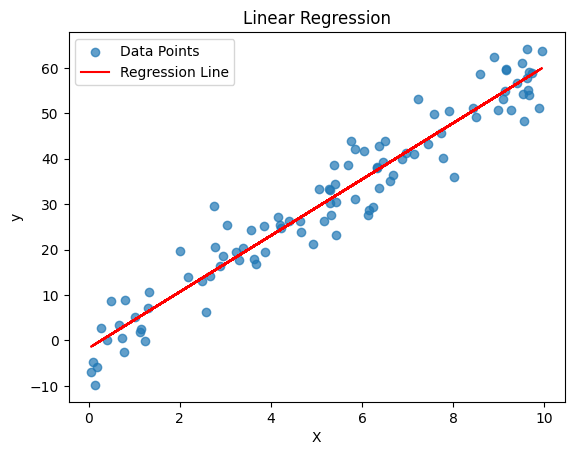

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data
X = np.random.rand(100, 1) * 10
y = 6 * X.flatten() + np.random.randn(100) * 5

# Fit model
model = LinearRegression()
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Plot results
plt.scatter(X, y, alpha=0.7, label="Data Points")
plt.plot(X, y_pred, color="red", label="Regression Line")
plt.title("Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


14. Write a Python script that uses the Variance Inflation Factor (VIF) to check for multicollinearity in a dataset
with multiple features.

In [79]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# Generate synthetic data
np.random.seed(42)
data = pd.DataFrame({
    'Feature1': np.random.rand(100) * 10,
    'Feature2': np.random.rand(100) * 10,
    'Feature3': np.random.rand(100) * 10
})

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = data.columns
vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]

print(vif_data)


    Feature       VIF
0  Feature1  2.574081
1  Feature2  2.482479
2  Feature3  2.529871


15. Write a Python script that generates synthetic data for a polynomial relationship (degree 4), fits a
polynomial regression model, and plots the regression curve.

ValueError: x and y must be the same size

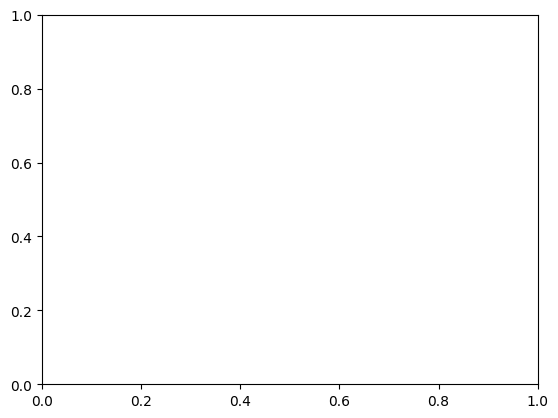

In [80]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = X**4 - 2 * X**3 + X**2 + np.random.randn(100, 1).flatten()

# Transform features
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

# Fit model
model = LinearRegression()
model.fit(X_poly, y)

# Predict
y_pred = model.predict(X_poly)

# Plot results
plt.scatter(X, y, alpha=0.7, label="Data Points")
plt.plot(X, y_pred, color="red", label="Regression Curve")
plt.title("Polynomial Regression (Degree 4)")
plt.legend()
plt.show()


16. Write a Python script that creates a machine learning pipeline with data standardization and a multiple
linear regression model, and prints the R-squared score.

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np

# Generate synthetic data
X = np.random.rand(100, 3) * 10
y = 4 * X[:, 0] + 3 * X[:, 1] + 5 * X[:, 2] + np.random.randn(100) * 5

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

# Train and evaluate
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("R-squared:", r2_score(y_test, y_pred))


R-squared: 0.9472157104608623


17. Write a Python script that performs polynomial regression (degree 3) on a synthetic dataset and plots the
regression curve.

ValueError: x and y must be the same size

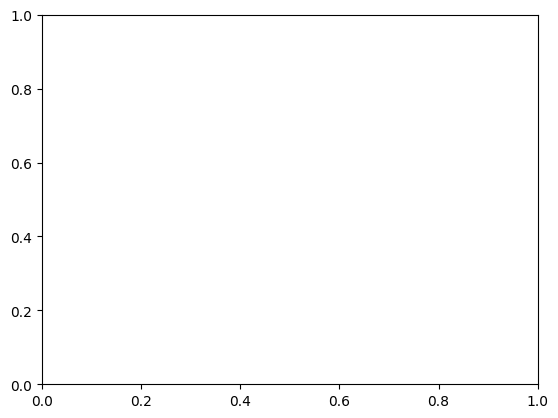

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = X**3 - 5 * X**2 + 4 * X + np.random.randn(100, 1).flatten()

# Transform features
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Fit model
model = LinearRegression()
model.fit(X_poly, y)

# Predict
y_pred = model.predict(X_poly)

# Plot results
plt.scatter(X, y, alpha=0.7, label="Data Points")
plt.plot(X, y_pred, color="red", label="Regression Curve")
plt.title("Polynomial Regression (Degree 3)")
plt.legend()
plt.show()


18. Write a Python script that performs multiple linear regression on a synthetic dataset with 5 features. Print
the R-squared score and model coefficients.

In [7]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import r2_score

# Generate synthetic data
X = np.random.rand(100, 5) * 10
y = 2 * X[:, 0] + 3 * X[:, 1] - X[:, 2] + 0.5 * X[:, 3] + X[:, 4] + np.random.randn(100)

# Fit model
model = LinearRegression()
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Print results
print("R-squared:", r2_score(y, y_pred))
print("Coefficients:", model.coef_)


R-squared: 0.9920488281984265
Coefficients: [ 1.99614117  3.01653433 -0.95860256  0.47769416  0.95880588]


19. Write a Python script that generates synthetic data for linear regression, fits a model, and visualizes the
data points along with the regression line

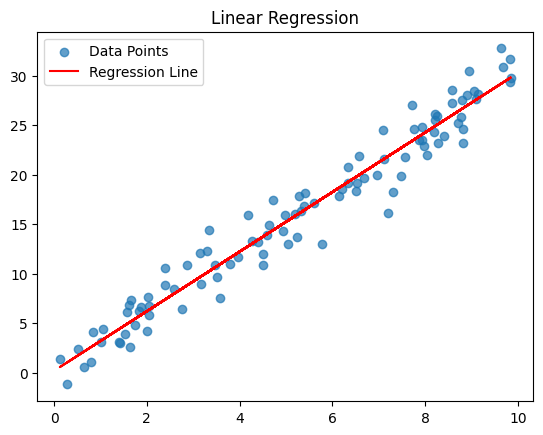

In [10]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
X = np.random.rand(100, 1) * 10
y = 3 * X.flatten() + np.random.randn(100) * 2

# Fit model
model = LinearRegression()
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Plot results
plt.scatter(X, y, alpha=0.7, label="Data Points")
plt.plot(X, y_pred, color="red", label="Regression Line")
plt.title("Linear Regression")
plt.legend()
plt.show()


20. Create a synthetic dataset with 3 features and perform multiple linear regression. Print the model's Rsquared score and coefficients.

In [11]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import r2_score

# Generate synthetic data
X = np.random.rand(100, 3) * 10
y = 3 * X[:, 0] + 2 * X[:, 1] + 1.5 * X[:, 2] + np.random.randn(100)

# Fit model
model = LinearRegression()
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Print results
print("R-squared:", r2_score(y, y_pred))
print("Coefficients:", model.coef_)


R-squared: 0.9934224655137144
Coefficients: [2.99201701 1.98354557 1.5379387 ]


21. Write a Python script that demonstrates how to serialize and deserialize machine learning models using
joblib instead of pickling

In [6]:
from sklearn.linear_model import LinearRegression
import joblib
import numpy as np

# Generate synthetic data
X = np.random.rand(100, 1) * 10
y = 4 * X.flatten() + np.random.randn(100) * 2

# Fit model
model = LinearRegression()
model.fit(X, y)

# Save model
joblib.dump(model, "linear_model.pkl")
print("Model saved as 'linear_model.pkl'")

# Load model
loaded_model = joblib.load("linear_model.pkl")
print("Loaded Model Coefficient:", loaded_model.coef_)


Model saved as 'linear_model.pkl'
Loaded Model Coefficient: [3.94958679]


22. Write a Python script to perform linear regression with categorical features using one-hot encoding. Use
the Seaborn 'tips' dataset.

In [5]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load dataset
tips = sns.load_dataset('tips')

# One-hot encode categorical features
data = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

# Features and target
X = data.drop('tip', axis=1)
y = data['tip']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

print("R-squared:", r2_score(y_test, y_pred))


R-squared: 0.43730181943482505


23. Compare Ridge Regression with Linear Regression on a synthetic dataset and print the coefficients and Rsquared score.

In [2]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score
import numpy as np

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 3) * 10
y = 4 * X[:, 0] + 3 * X[:, 1] - 2 * X[:, 2] + np.random.randn(100)

# Linear Regression
lr = LinearRegression()
lr.fit(X, y)
lr_pred = lr.predict(X)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X, y)
ridge_pred = ridge.predict(X)

# Print R-squared and coefficients
print("Linear Regression:")
print("R-squared:", r2_score(y, lr_pred))
print("Coefficients:", lr.coef_)

print("\nRidge Regression:")
print("R-squared:", r2_score(y, ridge_pred))
print("Coefficients:", ridge.coef_)


Linear Regression:
R-squared: 0.9966199915320296
Coefficients: [ 4.02780041  2.98422378 -1.94295942]

Ridge Regression:
R-squared: 0.99661885657145
Coefficients: [ 4.02316852  2.98134847 -1.94105398]


24. Write a Python script that uses cross-validation to evaluate a Linear Regression model on a synthetic
dataset.

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 3) * 10
y = 3 * X[:, 0] + 2 * X[:, 1] - X[:, 2] + np.random.randn(100)

# Model
model = LinearRegression()

# Cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print("Cross-validated R-squared scores:", scores)
print("Mean R-squared:", np.mean(scores))


Cross-validated R-squared scores: [0.98991793 0.98739121 0.99368454 0.99577758 0.99353393]
Mean R-squared: 0.9920610388238188


25. Write a Python script that compares polynomial regression models of different degrees and prints the Rsquared score for each.

In [81]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 5 * X**3 - 2 * X**2 + X + np.random.randn(100, 1).flatten()

# Compare models of different degrees
degrees = [1, 2, 3, 4]
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    # Fit model
    model = LinearRegression()
    model.fit(X_poly, y)

    # Predict and evaluate
    y_pred = model.predict(X_poly)
    r2 = r2_score(y, y_pred)
    print(f"Degree {degree}: R-squared = {r2:.4f}")


Degree 1: R-squared = 0.8354
Degree 2: R-squared = 0.9951
Degree 3: R-squared = 1.0000
Degree 4: R-squared = 1.0000
